# Transfer Learning

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys

import pickle

font = {'family' : 'sans-serif',
        #'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

#Results Beta
#file = "./results_casted_beta/results.accuracy.results_tfv1.1.1_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv1.1.2_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv1.2.1_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv1.2.2_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.1.1_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.1.2_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.2.1_C_1.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.2.1_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.2.1_C_3.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.2.1_C_3.5.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv2.2.2_C_3.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv3.1.1_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv3.1.2_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv3.2.1_C_2.0.csv"
#file = "./results_casted_beta/results.accuracy.results_tfv3.2.2_C_2.0.csv"

#Final results
#file = "./results_shifted_all_10it/results.accuracy.mean.csv"
#file = "./results_shifted_expanded_10it/results.accuracy.mean.csv"
#file = "./results_casted_all_10it/results.accuracy.mean.csv"
file = "./results_casted_all_10it/results.accuracy.all.top1.mean.csv"

#Obtain models info
model_names = list()
model_accuracys = list()
with open(file) as f:
    for line in f:
        tokens = line.split(',')
        model_names.append(tokens[0])
        model_accuracys.append(float(tokens[1].rstrip()))

#Obtain models metadata
models_metadata = dict()
for model in model_names:
	models_metadata[model] = dict()

pickle_models_filename = 'models_metadata.dmp'

if not os.path.isfile(pickle_models_filename):
	print("Reading models metadata...")
	#Obtain number of features (vocabulary) per model
	for i,model in enumerate(model_names):
	    with open('./llda_train_input/'+model+'_features.dat') as f:
	        line = f.readline()
	        models_metadata[model]['vocabulary_len'] = len(line.split())
	#Obtain number of tokens per model
	for model in model_names:
	    #model_data = "_".join(model.split('_')[:-1]) if "expanded" not in model else "_".join(model.split('_')[:-3]) 
	    with open('./llda_train_input/'+model+'.dat') as f:
	        tokens_count = 0
	        for line in f:
	                tokens_count += len(line.split())
	        models_metadata[model]['tokens_len'] = tokens_count

	#Obtain number of topics per model
	for model in model_names:
	    if 'expanded' in model:
	        tokens = model.split('_expanded')
	        labelmap_path = './llda_train_input/'+tokens[0]+'_labelmap.sub'
	    else:
	        labelmap_path = './llda_train_input/'+model+'_labelmap.sub'
	    
	    with open(labelmap_path) as f:
	        topics_count = 0
	        for line in f:
	        	topics_count += 1
	        models_metadata[model]['topics_count'] = topics_count

	pickleout = open(pickle_models_filename,'wb')
	pickle.dump(models_metadata,pickleout)
	pickleout.close()
else:
	print("Recovering models metadata from pickle dump...")
	picklein = open(pickle_models_filename,'rb')
	models_metadata = pickle.load(picklein)
	picklein.close()
    
model_vocabulary_len = []
model_tokens_len = []
model_topics_len = []
for model in model_names:
    if "expanded_00010" in model or "expanded_00002" in model:
        continue
    model_vocabulary_len.append(models_metadata[model]['vocabulary_len'])
    model_tokens_len.append(models_metadata[model]['tokens_len'])
    model_topics_len.append(models_metadata[model]['topics_count'])
    

results = zip(model_names, model_accuracys, model_vocabulary_len, model_topics_len)

results_tr = list()
results_2 = list()
results_full = list()

results_full_ex3_00050 = list()
results_full_ex3_00100 = list()
results_full_ex3_01000 = list()

for model, accuracy, vlen, topics in results:
    if model.endswith('tr'):
        results_tr.append((model,accuracy,vlen,topics))
    elif model.endswith('2'):
        results_2.append((model,accuracy,vlen,topics))
    elif model.endswith('full'):
        results_full.append((model,accuracy,vlen,topics))
    elif model.endswith('full_expanded_00050_x3'):
        results_full_ex3_00050.append((model,accuracy,vlen,topics))
    elif model.endswith('full_expanded_00100_x3'):
        results_full_ex3_00100.append((model,accuracy,vlen,topics))
    elif model.endswith('full_expanded_01000_x3'):
        results_full_ex3_01000.append((model,accuracy,vlen,topics))

Recovering models metadata from pickle dump...


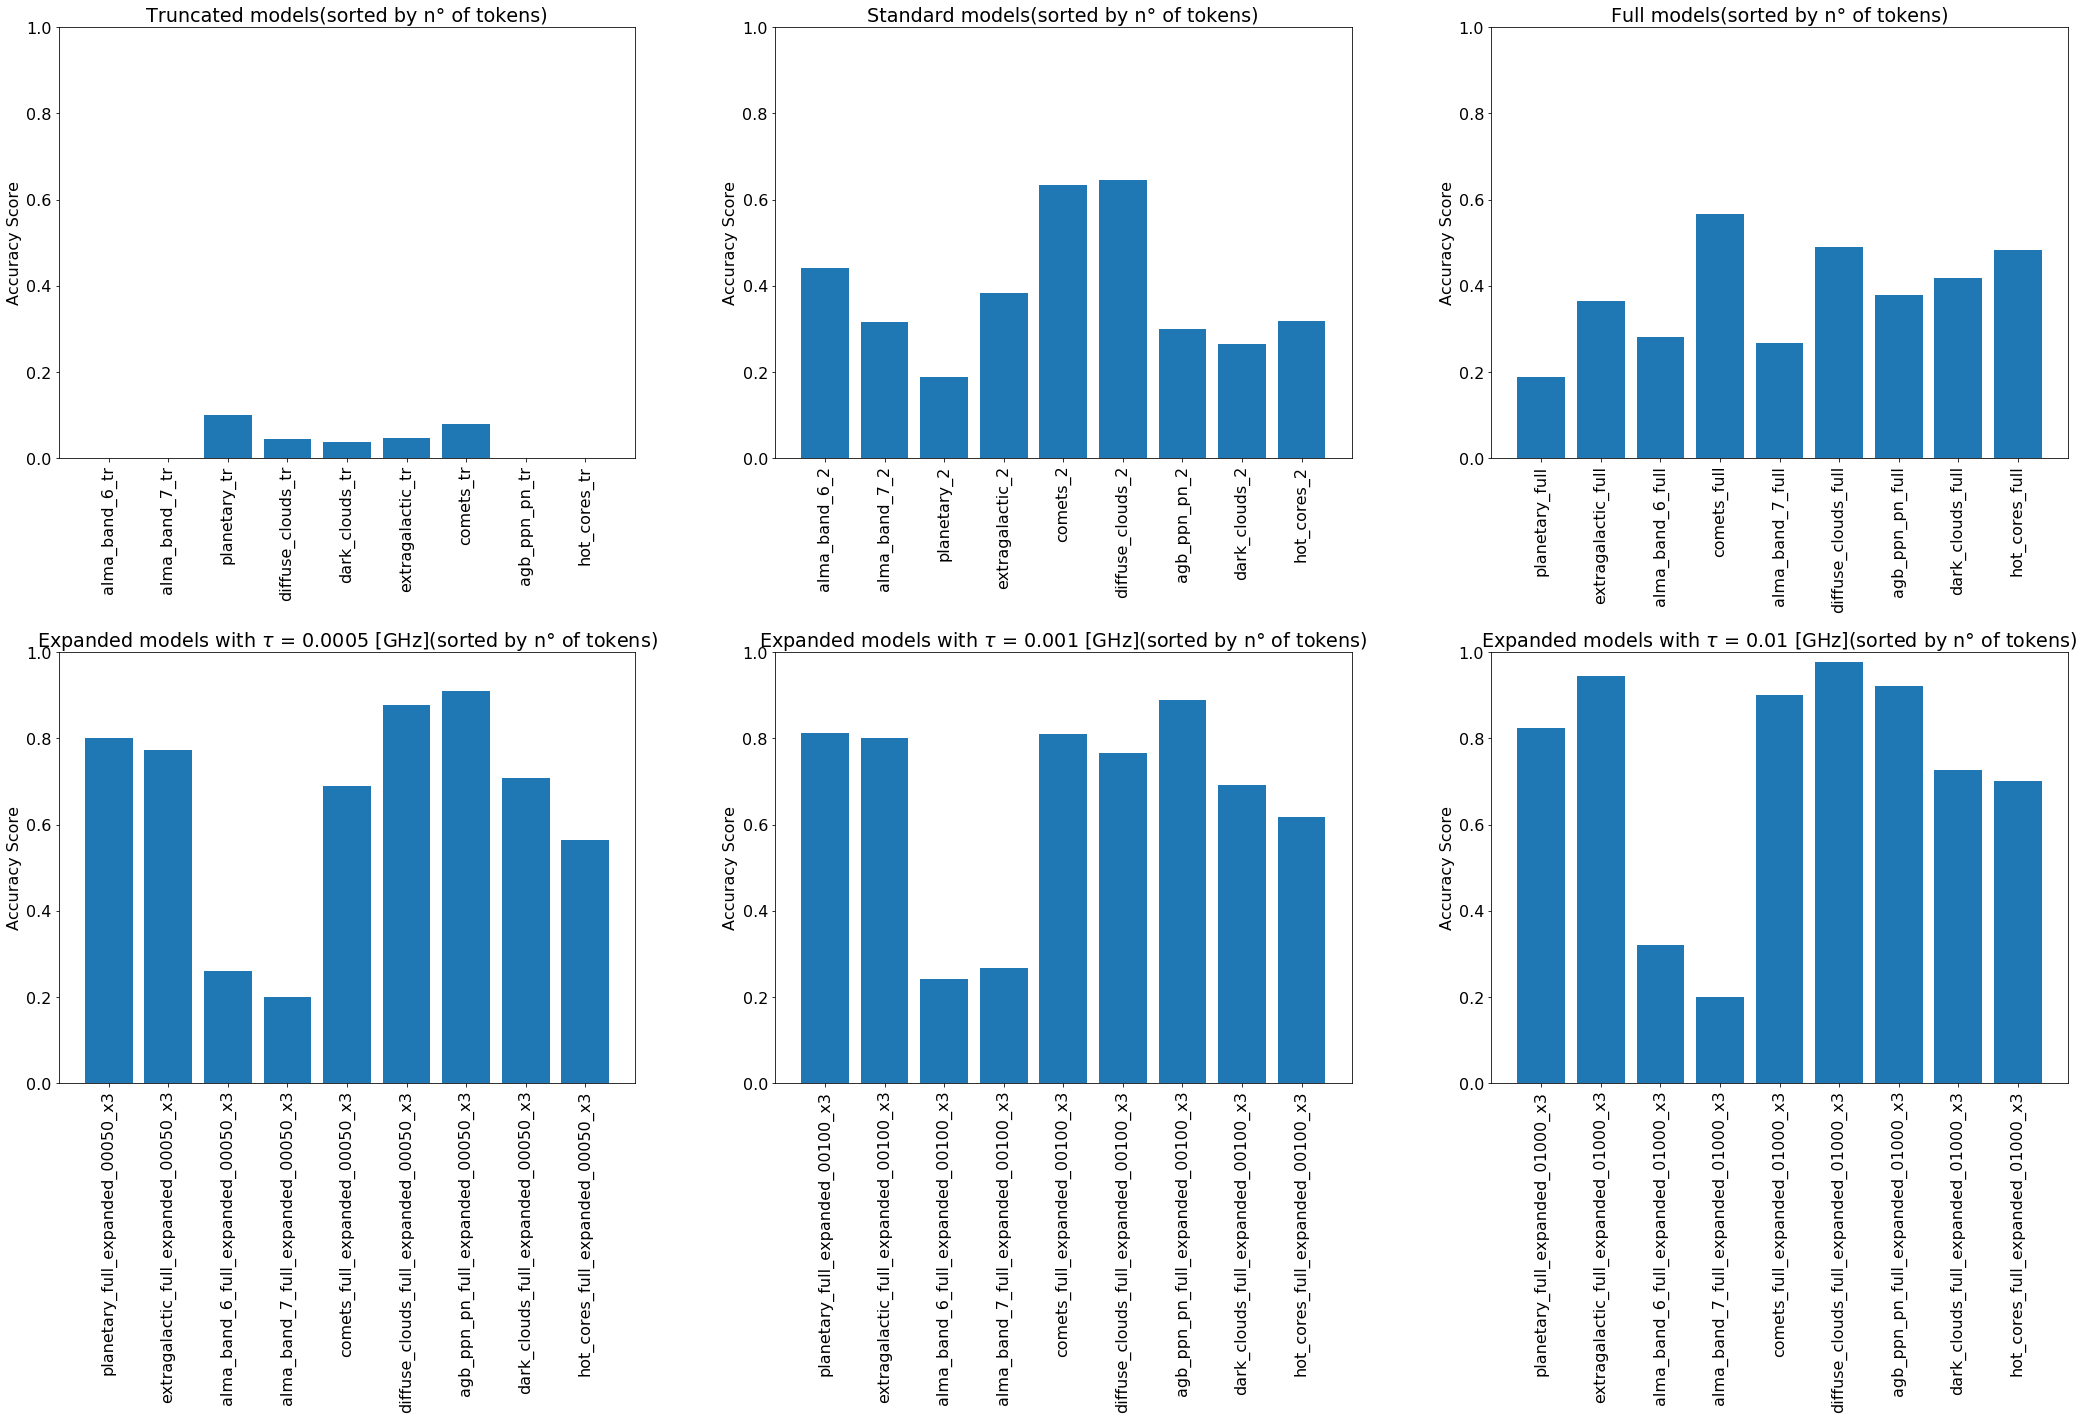

In [21]:
def plotScoreBars(channeling, results,rows,cols,subplot, title=""):
    axes = plt.gca()
    
    res_sortedby_vocabulary_len = sorted(results,key=lambda x: x[2])
    res_sortedby_topics_len = sorted(results,key=lambda x: x[3])
    
    x = range(len(results))
    
    plt.subplot(rows,cols,subplot)
    plt.bar(x, [i[1] for i in res_sortedby_vocabulary_len], align='center')
    plt.ylabel('Accuracy Score')
    plt.title(title+'(sorted by n° of tokens)')
    plt.xticks(x, [i[0] for i in res_sortedby_vocabulary_len],rotation='vertical')
    plt.ylim(0, 1)
    
    #plt.subplot(rows,cols,subplot+3)
    #plt.bar(x, [i[1] for i in res_sortedby_topics_len], align='center')
    #plt.ylabel('Accuracy Score')
    #plt.title(title+'(sorted by n° of topics)')
    #plt.xticks(x, [i[0] for i in res_sortedby_topics_len],rotation='vertical')
    #plt.ylim(0, 1)

plt.close('all')
fig = plt.figure(figsize=(30,20))

plotScoreBars(0,results_tr,2,3,1,"Truncated models")
plotScoreBars(2,results_2,2,3,2,"Standard models")
plotScoreBars(5,results_full,2,3,3,"Full models")

plotScoreBars(5,results_full_ex3_00050,2,3,4,"Expanded models with "+r"$\tau$"+" = 0.0005 [GHz]")
plotScoreBars(5,results_full_ex3_00100,2,3,5,"Expanded models with "+r"$\tau$"+" = 0.001 [GHz]")
plotScoreBars(5,results_full_ex3_01000,2,3,6,"Expanded models with "+r"$\tau$"+" = 0.01 [GHz]")

plt.tight_layout()
plt.show()